# `correlations`

Here, we investigate the correlations between experimentally-determined $T_m$ values, Michaelis-Menten constants, and conservation within Pfam GH01

In [47]:
%matplotlib inline
import pandas 
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import rc 

rc( 'font', family='Source Sans Pro' )
plt.style.use( 'bmh' ) 

In [48]:
df = pandas.read_csv( 'data_set/targets.csv', index_col=0 ) 
df.head()

,sequence_pos,expression,tm,k,err_tm,err_k,kcat,err_kcat,km,err_km,...,ki,ki_percent_err,ki_err,gel_number,target_expression,target_tm,target_kcat,target_km,target_kcatkm,conserved
mutant,,,,,,,,,,,,,,,,,,,,,
G12N,12.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.0,0,NaN,NaN,NaN,NaN,0.962179
S14A,14.0,1,40.16,-1.72,0.30,0.37,320.0,11.0,8.25,1.02,...,NaN,NaN,NaN,9.0,1,0.23,-0.439333,-0.217484,-0.651460,0.157390
T15A,15.0,1,39.17,-0.58,0.23,0.07,614.0,14.7,5.30,0.48,...,NaN,NaN,NaN,2.0,1,-0.76,-0.156314,-0.025306,-0.176657,0.615834
S16A,16.0,1,39.41,-0.83,0.27,0.16,154.0,1.0,14.01,0.40,...,NaN,NaN,NaN,5.0,1,-0.52,-0.756962,-0.447468,-1.199275,0.402336
S16N,16.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,0,NaN,NaN,NaN,NaN,0.402336


## Correlation between thermal stability and Michaelis-Menten parameters

First, let's visualize the changes that occur for each mutation

In [49]:
df.corr()[ 'target_tm' ][ [ 'target_kcat', 'target_km', 'target_kcatkm' ] ] 

target_kcat     -0.206373
target_km       -0.057911
target_kcatkm   -0.204243
Name: target_tm, dtype: float64

/Users/alex/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Source Sans Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


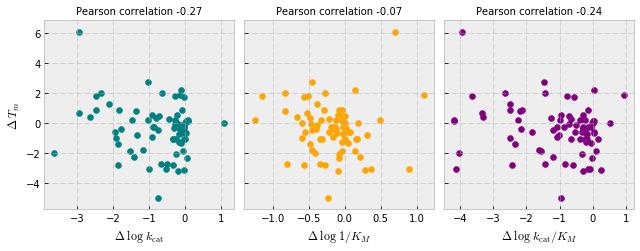

In [50]:
fig, ax = plt.subplots( nrows=1, ncols=3, figsize=(9,3.6), sharey=True )

ax[0].scatter( df.target_kcat, df.target_tm, color='teal' )
ax[0].set_xlabel( r'$\Delta \; \mathrm{log} \; k_{\mathrm{cat}}$' ) 
ax[0].set_ylabel( r'$\Delta \; T_m$' ) 
ax[0].set_title( 'Pearson correlation -0.27', fontsize='medium' )

ax[1].scatter( df.target_km, df.target_tm, color='orange' )
ax[1].set_xlabel( r'$\Delta \; \mathrm{log} \; 1/K_M$' )
ax[1].set_title( 'Pearson correlation -0.07' , fontsize='medium' )

ax[2].scatter( df.target_kcatkm, df.target_tm, color='purple' )
ax[2].set_xlabel( r'$\Delta \; \mathrm{log} \; k_\mathrm{{cat}}/K_M$' )
ax[2].set_title( 'Pearson correlation -0.24', fontsize='medium' )

fig.tight_layout()
fig.savefig( 'paper_draft/fig/fig_4_tm_versus_kinetic_constants.png', dpi=600 ) 

## Correlations between experimental data and conservation 

Is the percent conservation of each residue correlated to the change in thermal stability or functional parameters? 

In [51]:
df.corr()[ 'conserved' ][ [ 'target_kcat', 'target_km', 'target_kcatkm', 'target_tm' ] ] 

target_kcat     -0.706684
target_km       -0.162052
target_kcatkm   -0.694276
target_tm        0.302978
Name: conserved, dtype: float64

/Users/alex/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Source Sans Pro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


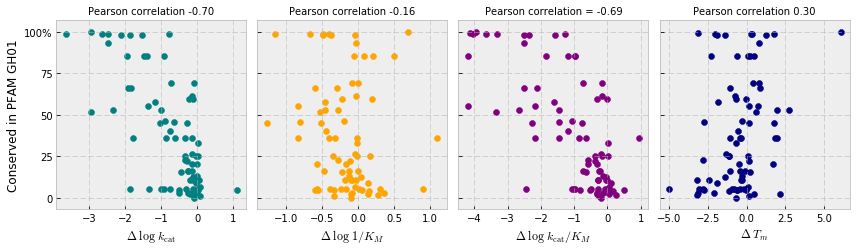

In [52]:
fig, ax = plt.subplots( nrows=1, ncols=4, figsize=(12,3.6), sharey=True )

ax[0].scatter( df.target_kcat, df.conserved, color='teal' )
ax[0].set_xlabel( r'$\Delta \; \mathrm{log} \; k_{\mathrm{cat}}$' ) 
ax[0].set_ylabel( 'Conserved in PFAM GH01', fontsize='large' )
ax[0].set_yticks( [ 0, .25, .50, .75, 1 ] )
ax[0].set_yticklabels( [ '0', '25', '50', '75', '100%' ] )
ax[0].set_title( 'Pearson correlation -0.70', fontsize='medium' )

ax[1].scatter( df.target_km, df.conserved, color='orange' )
ax[1].set_xlabel( r'$\Delta \; \mathrm{log} \; 1/K_M$' ) 
ax[1].set_title( 'Pearson correlation -0.16' , fontsize='medium' )

ax[2].scatter( df.target_kcatkm, df.conserved, color='purple' )
ax[2].set_xlabel( r'$\Delta \; \mathrm{log} \; k_\mathrm{{cat}}/K_M$' )
ax[2].set_title( 'Pearson correlation = -0.69', fontsize='medium' )

ax[3].scatter( df.target_tm, df.conserved, color='navy' )
ax[3].set_xlabel( r'$\Delta \; T_m$' )
ax[3].set_title( 'Pearson correlation 0.30', fontsize='medium' )

fig.tight_layout()
fig.savefig( 'paper_draft/fig/fig_5_percent_conserved_versus_all.png', dpi=600 ) 

# `tradeoffs`

Mutants that reveal tradeoffs

In [53]:
# mutations that reveal tradeoffs
cc = [ 'kcat', 'km', 'kcatkm' ] 
collect = []
for c in cc:
    collect.append( [
            len( df[ ( df.target_tm < 0 ) & ( df['target_{}'.format(c)] > 0 ) ] ), 
            len( df[ ( df.target_tm > 0 ) & ( df['target_{}'.format(c)] < 0 ) ] ), 
        ] )
    
print( collect ) 

[[4, 24], [14, 22], [6, 25]]
